In [3]:
import HTSeq
import numpy as np
import itertools
from matplotlib import pyplot 

## Accessed the data from HTSeq, and created an object of class FastqReader.

In [4]:
fastq_file = HTSeq.FastqReader( "/datasets/srp073813/SRR3438851_1.fastq.gz")
fastq_file

<FastqReader object, connected to file name '/datasets/srp073813/SRR3438851_1.fastq.gz'>

## Used the islice function from itertools to cut after 10 reads

In [5]:
for read in itertools.islice( fastq_file, 10 ):
    print(read)

ATCCATTCCAGGTGCTGGGTAATTTCGGTGAAGGGGGCACGGGTGCTGGG
ATAGTATCCATCCAACATGAGCATGGCAAGGGAAGTGAGCTGAGCTGTGC
GTTCAGTTACACACGGAGAAATTACATGTGGACCCAAACAGGCTCCTTTT
GGAATGCACTACAACAGGAAAATCATATTATAGATGGAGTAAAGGTCCAG
CAGTATATTAGTCAAATAGAAGCTTCATCAGAAATGTATCCCACATAGAG
ACTCTGAGCCNTGTCATCCAAGCTACCAGTCCCTGCACAACCAAGGGGTT
GTTCCAGGAGGATGAGACAGAGGTTCCACGTCTCCAGGCAAGCAGAGGAA
CCTTGGAGGAGCCCCCTCTAAGTCCAGACGTGGAGGAGGAGGACGATGAC
CAGCAGGTGATCTTTCTGTGTCTGGCGTATGCAGGAGGATATCTTTCTGT
ACACTTGAACNTGCCTAGTGAGACAACCATGCGTATCCTGACTTTTTCTG


## The variable read still contains the tenth read

In [6]:
display(read)
display(read.name)
display(read.seq)
print("Phred Quality Scores of the 10th read in the file of SRR3438851_1.fastq.gz")
display(read.qual)

<SequenceWithQualities object 'SRR3438851.10 10/1'>

'SRR3438851.10 10/1'

b'ACACTTGAACNTGCCTAGTGAGACAACCATGCGTATCCTGACTTTTTCTG'

Phred Quality Scores of the 10th read in the file of SRR3438851_1.fastq.gz


array([34, 34, 34, 37, 37, 37, 37, 37, 39, 39,  2, 18, 32, 38, 40, 41, 41,
       41, 40, 41, 41, 41, 40, 41, 41, 41, 41, 41, 41, 41, 41, 40, 41, 38,
       40, 40, 40, 41, 41, 40, 41, 41, 41, 41, 41, 41, 41, 40, 40, 41],
      dtype=uint8)

## Calculate the average quality score for each position in the reads by adding up the qual arrays from all reads and the dividing by the number of reads

In [5]:
display(len(read))
qualsum = np.zeros( len(read), np.int )
nreads = 0
for read in itertools.islice( fastq_file, 4000 ):
    qualsum += read.qual
    nreads += 1
display(qualsum / float(nreads) )

50

array([32.563  , 32.799  , 32.967  , 36.20225, 36.16425, 36.18975,
       36.111  , 36.05225, 37.78475, 37.7895 , 37.48525, 37.55625,
       37.7055 , 39.28375, 39.35575, 39.35925, 39.295  , 39.206  ,
       39.01775, 39.10975, 39.10075, 39.13725, 39.1715 , 39.13675,
       38.979  , 39.00975, 39.03125, 38.89475, 38.877  , 38.79275,
       38.68975, 38.6705 , 38.577  , 38.3885 , 38.28925, 38.2075 ,
       38.205  , 38.1895 , 38.1645 , 37.994  , 38.11725, 38.0475 ,
       37.949  , 37.855  , 37.818  , 37.78125, 37.59275, 37.4535 ,
       37.14025, 35.24725])

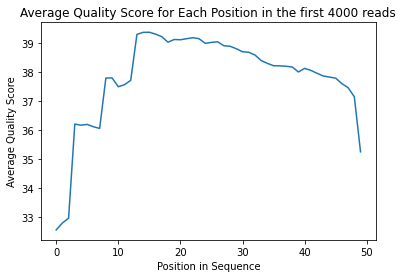

In [11]:
pyplot.plot( qualsum / nreads )
pyplot.title("Average Quality Score for Each Position in the first 4000 reads")
pyplot.xlabel("Position in Sequence")
pyplot.ylabel("Average Quality Score")
pyplot.show() 